<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/martingale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Martingale**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* In probability theory, a martingale is a sequence of random variables (for example **a stochastic process**) for which, at a particular time, the conditional expectation of the next value in the sequence, given all prior values, is equal to the present value.

* A martingale is characterized by the fact that **it is fair on average**. Martingales arise naturally from the modeling of fair gambling.(In a fair game of chance, **the expected value of each win is zero**)

* The closely related to the martingales are the super martingales, which are stochastic processes with an average loss and submartingales, which are stochastic processes with an average gain.

* The property of being a (sub- / super-) martingale does not belong to stochastic processes alone, but always to a stochastic process **in combination with filtration**. Therefore, the filtration should always be specified.

A **basic definition** of a discrete-time martingale is a discrete-time stochastic process (i.e., a sequence of random variables) X1, X2, X3, ... that satisfies for any time n,


> $\begin{array}{l}
\mathbf{E}\left(\left|X_{n}\right|\right)<\infty \\
\mathbf{E}\left(X_{n+1} \mid X_{1}, \ldots, X_{n}\right)=X_{n}
\end{array}$

That is, the conditional expected value of the next observation, given all the past observations, is equal to the most recent observation.



A **continuous-time martingale** with respect to the stochastic process X<sub>t</sub> is a stochastic process Y<sub>t</sub> such that for all t

> $\begin{array}{l}
\mathbf{E}\left(\left|Y_{t}\right|\right)<\infty \\
\mathbf{E}\left(Y_{t} \mid\left\{X_{\tau}, \tau \leq s\right\}\right)=Y_{s} \quad \forall s \leq t
\end{array}$

This expresses the property that the conditional expectation of an observation at time t, given all the observations up to time s, is equal to the observation at time s (of course, provided that s ≤ t). Note that the second property implies that Yn is measurable with respect to X1 … Xn.

In **full generality**, a stochastic process Y : T × Ω → S taking value in a [Banach space](https://en.m.wikipedia.org/wiki/Banach_space) S is a martingale with respect to a filtration Σ∗ and probability measure P if

**Examples of martingales**

* An unbiased random walk (in any number of dimensions)

* A Wiener process Wt is a martingale, and for a Wiener process the processes W<sub>t</sub><sup>2</sup> - t and the geometric Brownian movement without drift are martingales.

* Stopped Brownian motion, which can be used to model the trajectory of such games

* A gambler's fortune (capital) is a martingale if all the betting games which the gambler plays are fair. To be more specific: suppose Xn is a gambler's fortune after n tosses of a fair coin, where the gambler wins USD 1 if the coin comes up heads and loses USD 1 if it comes up tails. The gambler's conditional expected fortune after the next trial, given the history, is equal to their present fortune. This sequence is thus a martingale.

* If { Nt : t ≥ 0 } is a Poisson process with intensity λ, then the compensated Poisson process { Nt − λt : t ≥ 0 } is a continuous-time martingale with [right-continuous/left-limit](https://en.m.wikipedia.org/wiki/Classification_of_discontinuities) sample paths.

* ([Likelihood-ratio testing](https://en.m.wikipedia.org/wiki/Likelihood-ratio_test) in statistics) A random variable X is thought to be distributed according either to probability density f or to a different probability density g. A random sample X1, ..., Xn is taken. Let Yn be the "likelihood ratio":

> $Y_{n}=\prod_{i=1}^{n} \frac{g\left(X_{i}\right)}{f\left(X_{i}\right)}$

If X is actually distributed according to the density f rather than according to g, then { Yn : n = 1, 2, 3, ... } is a martingale with respect to { Xn : n = 1, 2, 3, ... }.

**Stopped Brownian Motion**

* a stopped process is a stochastic process that is forced to assume the same value after a prescribed (possibly random) time.

https://en.m.wikipedia.org/wiki/Stopped_process#Brownian_motion

## **Simulate Martingale Process**

Toss a coin. toss results (1=lose 0=win). The first step is to find the edges of the losing runs, (steps + edges). You then need to take the difference of the sizes of the steps and shove those values back into the original data. When you take a cumsum of toss2 it gives you the current length of your losing streak. Your bet is then 2 ** cumsum(toss2).

In [3]:
toss = np.random.randint(0,2,100)

toss = pd.Series(toss)

steps = (toss.cumsum() * toss).diff() # mask out the cumsum where we won [0 1 2 3 0 0 4 5 6 ... ]
edges = steps < 0 # find where the cumsum steps down -> where we won
dsteps = steps[edges].diff() # find the length of each losing streak
dsteps[steps[edges].index[0]] = steps[edges][:1] # fix length of the first run which in now NaN
toss2 = toss.copy() # get a copy of the toss series
toss2[edges] = dsteps # insert the length of the losing streaks into the copy of the toss results
bets = 2 ** (toss2).cumsum() # compute the wagers

res = pd.DataFrame({'toss': toss,
                    'toss2': toss2,
                    'runs': toss2.cumsum(),
                    'next_bet': bets})

res

,toss,toss2,runs,next_bet
0,0,0,0,1
1,0,0,0,1
2,1,1,1,2
3,0,-1,0,1
4,1,1,1,2
...,...,...,...,...
95,0,-1,0,1
96,0,0,0,1
97,1,1,1,2
98,0,-1,0,1


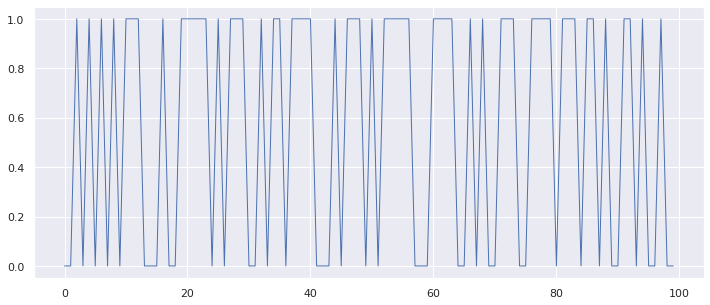

In [7]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
plt.plot(res.toss)

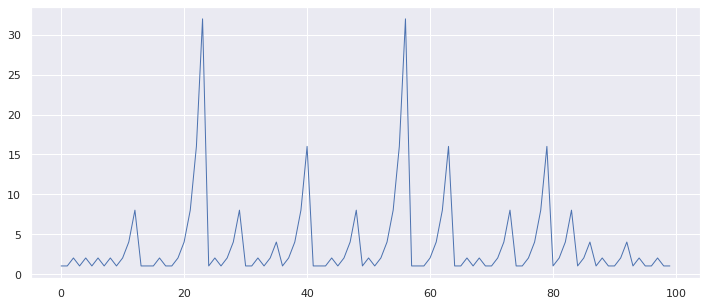

In [11]:
# Your bet
plt.plot(res.next_bet)